# A digit recognision model by using mnist dataset

## Importing some library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

## Importing mnist data & loading all train and test data

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Converting all value from 0 to 1

In [6]:
x_train = x_train/255.
x_test = x_test/255.

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train[0].max()

1.0

In [9]:
x_train[0].min()

0.0

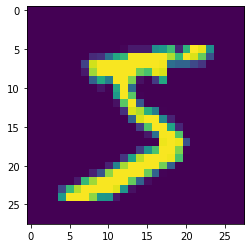

In [10]:
plt.imshow(x_train[0])

## Creating a Deep Learning  model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [13]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=25,
    verbose=1, 
    restore_best_weights= True
    )
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1,
    min_delta=0.0001
)

In [14]:
callback=[earlystop, reduce_lr]

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=callback)

Epoch 1/100
1500/1500 [==============================] - 74s 47ms/step - loss: 0.2540 - accuracy: 0.9208 - val_loss: 0.0917 - val_accuracy: 0.9741 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1181 - accuracy: 0.9648 - val_loss: 0.0647 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 62s 42ms/step - loss: 0.0962 - accuracy: 0.9717 - val_loss: 0.0635 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0838 - accuracy: 0.9754 - val_loss: 0.0494 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0707 - accuracy: 0.9787 - val_loss: 0.0515 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0642 - accuracy: 0.9805 - val_loss: 0.0438 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 7/100
1500/1500 [=================

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0297 - accuracy: 0.9929


[0.029686838388442993, 0.992900013923645]

313/313 [==============================] - 4s 11ms/step
Real value is:  7
Predicted value is:  7


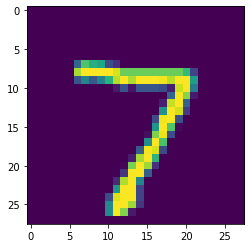

In [18]:
plt.imshow(x_test[0])
prediction = model.predict(x_test)
print('Real value is: ', y_test[0])
print('Predicted value is: ', np.argmax(prediction[0]))